<ipython-input-1-0c001520a572>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())
<ipython-input-1-0c001520a572>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VelMitjanaVol'] = (df['Distance'] / df['AirTime'])


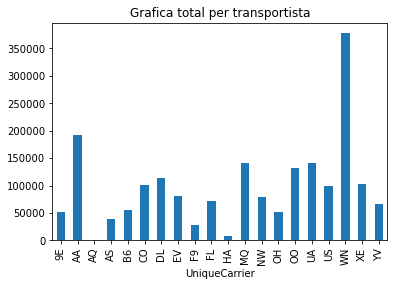

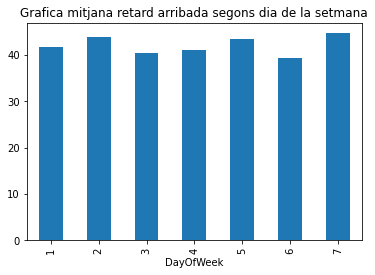

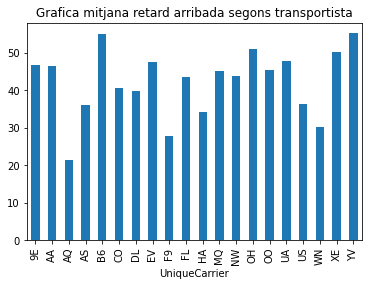

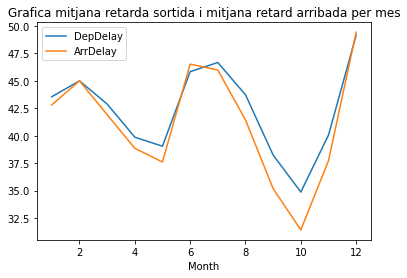

C:\Users\mcarm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


DelayFligths_df = pd.read_csv("DelayedFlights.csv", parse_dates=True)


df=DelayFligths_df[["Year","Month","DayofMonth","DayOfWeek","UniqueCarrier","Origin","Dest","AirTime","Distance","ArrDelay","DepDelay"]]


df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())


df['VelMitjanaVol'] = (df['Distance'] / df['AirTime'])

#Una variable categòrica (UniqueCarrier)
df.groupby('UniqueCarrier').size().plot(kind='bar');

plt.title("Grafica total per transportista")
plt.show()
#Una variable numèrica (ArrDelay)
df.groupby("DayOfWeek").mean()["ArrDelay"].plot(kind="bar")
plt.title("Grafica mitjana retard arribada segons dia de la setmana")
plt.show()

#Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

df.groupby("UniqueCarrier").mean()["ArrDelay"].plot(kind="bar")
plt.title("Grafica mitjana retard arribada segons transportista")
plt.show()
#Dues variables numèriques (ArrDelay i DepDelay)

df.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line()

plt.title("Grafica mitjana retarda sortida i mitjana retard arribada per mes")
plt.show()

sns.lmplot('DepDelay', 'ArrDelay', data=df,
           fit_reg=False, hue='UniqueCarrier', scatter_kws={'alpha':0.3})

plt.title("Diagrama de dispersió entre temps retard sortida i temps retard arribada")
plt.xlabel("Retard sortida")
plt.ylabel("Retard en arribada");
plt.show()


df.groupby('UniqueCarrier')[['ArrDelay', 'DepDelay', 'AirTime']].sum().plot.line()
plt.title("Gràfica per transportista, respecte retard Arribada, retard sortida i temps de vol")
plt.show()
